# MUSE DATA

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.stats import skew

% matplotlib inline

### Constants

In [2]:
c = 299792 #km/s
lya_lambda = 1215.67 #nm
lya_nu = 2.46 * (10**15) #Hz

### Main Table

In [3]:
hdul = fits.open('MW_1-24_main_table.fits')
hdul.info()

Filename: MW_1-24_main_table.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       4   ()      
  1              BinTableHDU     39   831R x 14C   [21A, D, D, D, D, 5A, D, 5A, I, 60A, 5A, D, 5A, D]   


In [4]:
data = hdul[1].data
hdul.close()

In [5]:
data.columns

ColDefs(
    name = 'UNIQUE_ID'; format = '21A'
    name = 'RA'; format = 'D'; unit = 'deg'
    name = 'DEC'; format = 'D'; unit = 'deg'
    name = 'Z'; format = 'D'
    name = 'Z_ERR'; format = 'D'
    name = 'LEAD_LINE'; format = '5A'
    name = 'SN'; format = 'D'
    name = 'QUALITY'; format = '5A'
    name = 'CONFIDENCE'; format = 'I'
    name = 'OTHER_LINES'; format = '60A'
    name = 'Guo_ID'; format = '5A'
    name = 'Guo_sep'; format = 'D'
    name = 'Skelton_ID'; format = '5A'
    name = 'Skelton_sep'; format = 'D'
)

In [6]:
# filter by high quality = a

q = 'a'

data = data[data['QUALITY'] == q]

print(data.size)

288


In [7]:
# filter by lead line and other lines = lya

lya = 'Lya'
lya_ids = []
lya_zs = []

for d in data:
    lead = d['LEAD_LINE']
    others = d['OTHER_LINES']
    if ((lya == lead) or (lya in others)):
        lya_ids.append(d['UNIQUE_ID'])
        lya_zs.append(d['Z'])

In [8]:
lya_ids

['104014050', '115003085']

### Emline Table

In [9]:
hdul = fits.open('MW_1-24_emline_table.fits')
hdul.info()

Filename: MW_1-24_emline_table.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       4   ()      
  1              BinTableHDU     81   1652R x 27C   [10A, I, I, I, 5A, 27A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, L]   


In [10]:
data = hdul[1].data
hdul.close()

In [11]:
data.columns

ColDefs(
    name = 'UNIQUE_ID'; format = '10A'
    name = 'POINTING_ID'; format = 'I'
    name = 'OBJ_ID'; format = 'I'
    name = 'RID'; format = 'I'
    name = 'IDENT'; format = '5A'
    name = 'COMMENT'; format = '27A'
    name = 'SN'; format = 'D'
    name = 'RA_SN'; format = 'D'; unit = 'deg'
    name = 'DEC_SN'; format = 'D'; unit = 'deg'
    name = 'LAMBDA_SN'; format = 'D'; unit = 'Angstrom'
    name = 'RA_PEAK_SN'; format = 'D'; unit = 'deg'
    name = 'DEC_PEAK_SN'; format = 'D'; unit = 'deg'
    name = 'LAMBDA_PEAK_SN'; format = 'D'; unit = 'Angstrom'
    name = 'LAMBDA_NB_MIN'; format = 'D'; unit = 'Angstrom'
    name = 'LAMBDA_NB_MAX'; format = 'D'; unit = 'Angstrom'
    name = 'RA_1MOM'; format = 'D'; unit = 'deg'
    name = 'DEC_1MOM'; format = 'D'; unit = 'deg'
    name = 'R_KRON'; format = 'D'; unit = 'arcsec'
    name = 'F_KRON'; format = 'D'; unit = 'cm-2 erg s-1'
    name = 'F_2KRON'; format = 'D'; unit = 'cm-2 erg s-1'
    name = 'F_3KRON'; format = 'D'; unit = 'c

In [12]:
# Filter by previous uids

lya_peak, lya_min, lya_max = [], [], []

for d in data:
    if ((d['UNIQUE_ID'] in lya_ids) and (lya == d['IDENT'])):
        lya_peak.append(d['LAMBDA_PEAK_SN']) # angstroms 
        lya_min.append(d['LAMBDA_NB_MIN']) # angstroms 
        lya_max.append(d['LAMBDA_NB_MAX']) # angstroms 

In [13]:
print(lya_ids)
print(lya_zs)
print(lya_peak)
print(lya_min)
print(lya_max)

['104014050', '115003085']
[3.66090989112854, 3.709820032119751]
[5664.91650390625, 5722.22900390625]
[5653.04150390625, 5706.60400390625]
[5683.04150390625, 5737.85400390625]


### Spectra

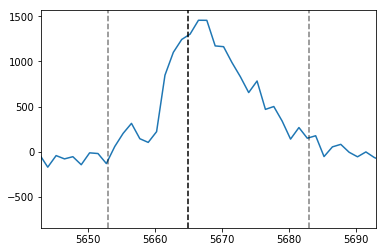

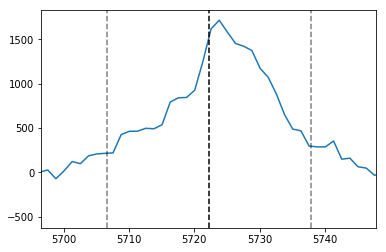

In [14]:
lya_xs, lya_ys = [], []

for i in range(len(lya_ids)):
    fn = 'spectrum_' + str(lya_ids[i]) + '.fits'
    hdul = fits.open(fn)
    data = hdul[1].data
    hdul.close()
    
    x = data['WAVE_VAC'] # angstroms 
    y = data['FLUX']
    z = lya_zs[i]
    
    peak = lya_peak[i]
    minn = lya_min[i]
    maxx = lya_max[i]
    
    plt.plot(x,y)
    plt.axvline(peak, 0, 1, linestyle='--',  color='k')
    plt.axvline(minn, 0, 1, linestyle='--',  color='k', alpha=0.5)
    plt.axvline(maxx, 0, 1, linestyle='--',  color='k', alpha=0.5)
    plt.xlim(minn-10, maxx+10)
    plt.show()
    
    # redshift
    x = x/(1+z) 
    peak = peak/(1+z)
    minn = minn/(1+z)
    maxx = maxx/(1+z)
    
    '''
    plt.plot(x,y)
    plt.axvline(peak, 0, 1, linestyle='--',  color='k')
    plt.axvline(minn, 0, 1, linestyle='--',  color='k', alpha=0.5)
    plt.axvline(maxx, 0, 1, linestyle='--',  color='k', alpha=0.5)
    plt.xlim(minn-5, maxx+5)
    plt.show()
    '''
    
    # angstrom to velocity (km/s)
    x = c*(1 - lya_lambda/x)
    peak = c*(1 - lya_lambda/peak)
    minn = c*(1 - lya_lambda/minn)
    maxx = c*(1 - lya_lambda/maxx)
    
    '''
    plt.plot(x,y)
    plt.axvline(peak, 0, 1, linestyle='--',  color='k')
    plt.axvline(minn, 0, 1, linestyle='--',  color='k', alpha=0.5)
    plt.axvline(maxx, 0, 1, linestyle='--',  color='k', alpha=0.5)
    plt.xlim(peak-1000, peak+1000)
    plt.show()
    '''
    
    # center
    x = x - peak
    minn = minn - peak
    maxx = maxx - peak
    peak = 0
    
    '''
    plt.plot(x,y)
    plt.axvline(peak, 0, 1, linestyle='--',  color='k')
    plt.axvline(minn, 0, 1, linestyle='--',  color='k', alpha=0.5)
    plt.axvline(maxx, 0, 1, linestyle='--',  color='k', alpha=0.5)
    plt.xlim(minn-5, maxx+5)
    plt.show()
    '''
    
    # save them
    lya_peak[i] = peak
    lya_min[i] = minn
    lya_max[i] = maxx
    
    lya_xs.append(x)
    lya_ys.append(y)

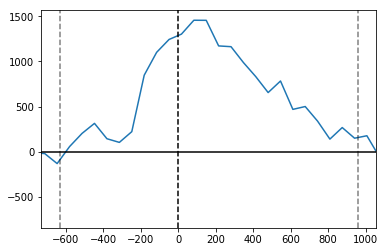

In [17]:
plt.plot(lya_xs[0], lya_ys[0])
plt.xlim(lya_min[0]-100, lya_max[0]+100)
plt.axvline(lya_peak[0], 0, 1, linestyle='--',  color='k')
plt.axvline(lya_min[0], 0, 1, linestyle='--',  color='k', alpha=0.5)
plt.axvline(lya_max[0], 0, 1, linestyle='--',  color='k', alpha=0.5)
plt.axhline(0, 0, 1, linestyle='-',  color='k')

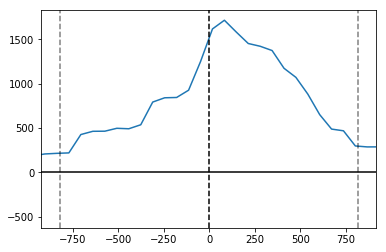

In [18]:
plt.plot(lya_xs[1], lya_ys[1])
plt.xlim(lya_min[1]-100, lya_max[1]+100)
plt.axvline(lya_peak[1], 0, 1, linestyle='--',  color='k')
plt.axvline(lya_min[1], 0, 1, linestyle='--',  color='k', alpha=0.5)
plt.axvline(lya_max[1], 0, 1, linestyle='--',  color='k', alpha=0.5)
plt.axhline(0, 0, 1, linestyle='-',  color='k')

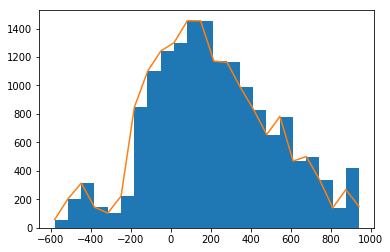

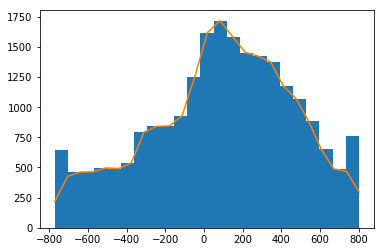

In [54]:
lya_stds, lya_skws = [], []

for i in range(len(lya_ids)):
    x = lya_xs[i]
    y = lya_ys[i]
    
    inds_sub = np.where((x>=lya_min[i]) & (x<=lya_max[i]))
    
    x_sub = x[inds_sub]
    y_sub = y[inds_sub]
    
    n, b = np.histogram(x_sub, weights=y_sub, bins=23)
    
    vs = np.array([])
    for j in range(len(n)):
        n_j = int(n[j])
        b_prev = b[j]
        b_next = b[j+1]
        
        vs_j = np.linspace(b_prev, b_next, n_j)
        vs = np.concatenate((vs, vs_j))
    
    plt.hist(vs, bins=23)
    plt.plot(x_sub, y_sub)
    plt.show()

    std_i = np.std(vs)
    skw_i = skew(vs)
    
    lya_stds.append(std_i)
    lya_skws.append(skw_i)
    
    #y_sub = y_sub/np.sum(y_sub)
    #sub = np.array([x_sub, y_sub]).T
    #fn = 'muse_lya_' + str(lya_ids[i]) + '.txt'
    #np.savetxt(fn, sub)

In [55]:
stats = np.array([lya_stds, lya_skws]).T
np.savetxt('muse_stats.txt', stats) # std, skw